# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

In [1]:
%matplotlib inline
import numpy as np
import matplotlib
from matplotlib import pyplot as plt
import tensorflow as tf
import cv2 as cv
import pickle


---
## Step 0: Load The Data

In [2]:
def load_pickled_data(file, columns):
    
    with open(file, mode='rb') as f:
        dataset = pickle.load(f)
    return tuple(map(lambda c: dataset[c], columns))

In [3]:
# Load pickled data
import pickle
from pandas.io.parsers import read_csv

# TODO: Fill this in based on where you saved the training and testing data
training_file = 'train.p'
validation_file='valid.p'
testing_file = 'test.p'
traffic_sign_meaning = read_csv("signnames.csv").values[:, 1]


X_train, y_train = load_pickled_data(training_file, ['features', 'labels'])
X_test, y_test = load_pickled_data(testing_file, ['features', 'labels'])
X_valid, y_valid = load_pickled_data(validation_file, ['features', 'labels'])


---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [45]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results
import numpy as np

# Number of training examples
n_train = y_train.shape[0]
y_shape = y_train.shape

# Number of testing examples.
n_test = y_test.shape[0]

# What's the shape of an traffic sign image?
image_shape = X_train[0].shape

# How many unique classes/labels there are in the dataset.
# https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.unique.html
sign_classes, class_indices, class_counts = np.unique(y_train, return_index = True, return_counts = True)
n_classes = class_counts.shape[0]

y_shape_end = y_train.shape

# Print the Image properties
print("Number of training examples =", n_train)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc.

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections.

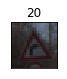

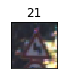

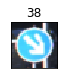

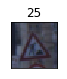

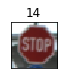

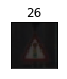

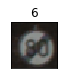

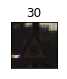

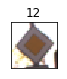

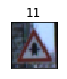

In [167]:
### Data exploration visualization code goes here.
import matplotlib.pyplot as plt
import random
import numpy as np

get_ipython().magic('matplotlib inline')


#show up an random image out of the X_train data set
for i in range(10):
    index = random.randint(0, len(X_train))
    image = X_train[index].squeeze()
    fig = plt.figure(figsize=(3,10))
    axis = fig.add_subplot(10, 1, i + 1, xticks=[], yticks=[],title=y_train[index])
    plt.imshow(image) #plot an image with three channels which means colored



(array([  180.,  1980.,  2010.,  1260.,  1770.,  1650.,   360.,  1290.,
         1260.,  1320.,  1800.,  1170.,  1890.,  1920.,   690.,   540.,
          360.,   990.,  1080.,   180.,   300.,   270.,   330.,   450.,
          240.,  1350.,   540.,   210.,   480.,   240.,   390.,   690.,
          210.,   599.,   360.,  1080.,   330.,   180.,  1860.,   270.,
          300.,   210.,   210.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.20930233,  34.18604651,
         35.1627907 ,  36.1395

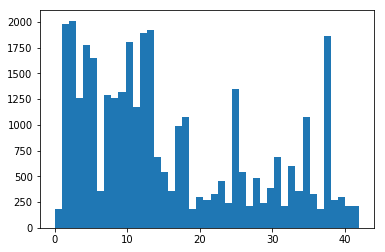

In [6]:
# Analysis of how the several classes are balanced before argmented 
plt.hist(y_train, bins=43)

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### Pre-process the Data Set (normalization, grayscale, etc.)

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [4]:
import sys
# Print iterations progress
def print_progress(iteration, total):
    """
    Call in a loop to create terminal progress bar
    
    Parameters
    ----------
        
    iteration : 
                Current iteration (Int)
    total     : 
                Total iterations (Int)
    """
    str_format = "{0:.0f}"
    percents = str_format.format(100 * (iteration / float(total)))
    filled_length = int(round(100 * iteration / float(total)))
    bar = '█' * filled_length + '-' * (100 - filled_length)

    sys.stdout.write('\r |%s| %s%%' % (bar, percents)),

    if iteration == total:
        sys.stdout.write('\n')
    sys.stdout.flush()

In [5]:
from nolearn.lasagne import BatchIterator
from skimage.transform import rotate
from skimage.transform import warp
from skimage.transform import ProjectiveTransform
import random

class AugmentedSignsBatchIterator(BatchIterator):
    """
    Iterates over dataset in batches. 
    Allows images augmentation by randomly rotating, applying projection, 
    adjusting gamma, blurring, adding noize and flipping horizontally.
    """
        
    def __init__(self, batch_size, shuffle = False, seed = 42, p = 0.5, intensity = 0.5):
        """
        Initialises an instance with usual iterating settings, as well as data augmentation coverage
        and augmentation intensity.
        
        Parameters
        ----------
        batch_size:
                    Size of the iteration batch.
        shuffle   :
                    Flag indicating if we need to shuffle the data.
        seed      :
                    Random seed.
        p         :
                    Probability of augmenting a single example, should be in a range of [0, 1] .
                    Defines data augmentation coverage.
        intensity :
                    Augmentation intensity, should be in a [0, 1] range.
        
        Returns
        -------
        New batch iterator instance.
        """
        super(AugmentedSignsBatchIterator, self).__init__(batch_size, shuffle, seed)
        self.p = p
        self.intensity = intensity

    def transform(self, Xb, yb):
        """
        Applies a pipeline of randomised transformations for data augmentation.
        """
        Xb, yb = super(AugmentedSignsBatchIterator, self).transform(
            Xb if yb is None else Xb.copy(), 
            yb
        )
        
        if yb is not None:
            batch_size = Xb.shape[0]
            image_size = Xb.shape[1]
            
            Xb = self.rotate(Xb, batch_size)
            Xb = self.apply_projection_transform(Xb, batch_size, image_size)

        return Xb, yb
        
    def rotate(self, Xb, batch_size):
        """
        Applies random rotation in a defined degrees range to a random subset of images. 
        Range itself is subject to scaling depending on augmentation intensity.
        """
        for i in np.random.choice(batch_size, int(batch_size * self.p), replace = False):
            delta = 30. * self.intensity # scale by self.intensity
            Xb[i] = rotate(Xb[i], random.uniform(-delta, delta), mode = 'edge')
        return Xb   
    
    def apply_projection_transform(self, Xb, batch_size, image_size):
        """
        Applies projection transform to a random subset of images. Projection margins are randomised in a range
        depending on the size of the image. Range itself is subject to scaling depending on augmentation intensity.
        """
        d = image_size * 0.3 * self.intensity
        for i in np.random.choice(batch_size, int(batch_size * self.p), replace = False):        
            tl_top = random.uniform(-d, d)     # Top left corner, top margin
            tl_left = random.uniform(-d, d)    # Top left corner, left margin
            bl_bottom = random.uniform(-d, d)  # Bottom left corner, bottom margin
            bl_left = random.uniform(-d, d)    # Bottom left corner, left margin
            tr_top = random.uniform(-d, d)     # Top right corner, top margin
            tr_right = random.uniform(-d, d)   # Top right corner, right margin
            br_bottom = random.uniform(-d, d)  # Bottom right corner, bottom margin
            br_right = random.uniform(-d, d)   # Bottom right corner, right margin

            transform = ProjectiveTransform()
            transform.estimate(np.array((
                    (tl_left, tl_top),
                    (bl_left, image_size - bl_bottom),
                    (image_size - br_right, image_size - br_bottom),
                    (image_size - tr_right, tr_top)
                )), np.array((
                    (0, 0),
                    (0, image_size),
                    (image_size, image_size),
                    (image_size, 0)
                )))
            Xb[i] = warp(Xb[i], transform, output_shape=(image_size, image_size), order = 1, mode = 'edge')

        return Xb

/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")
/home/carnd/anaconda3/envs/carnd-term1/lib/python3.5/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [6]:
### Preprocess the data.
# First step is to grayscale the images.
# Second step is to  normalize the images.
import random
from sklearn.utils import shuffle
import cv2 as cv

def pre_precess_gray_normalize(X, y=None):

    print("Preprocess of data which counts {} examples :".format(X.shape[0])) #print the number of input images
    print(" Shape of input data array at start {}:".format(X[0].shape))   
    print('=======================PLOT RANDOM INPUT IMAGE=============================================')
    # out for orientation on which step we ware in function
    index = random.randint(0, len(X)) # choose a random index out of the length of the input data array
    image = X[index].squeeze()  
    plt.figure(figsize=(1,1)) 
    plt.imshow(image)   #plot images in three channel mode like expected by useing input data
    
    print('=======================CALCULATE GRAYSCALED IMAGES=========================================')    
    #Standart values often used Gray = 0.299×Red + 0.587×Green + 0.114×Blue
    #better approximation often used Gray = 0.2126×Red + 0.7152×Green + 0.0722×Blue
    #Convert to grayscale, e.g. single channel Y
    X = 0.2126 * X[:, :, :, 0] + 0.7152 * X[:, :, :, 1] + 0.0722 * X[:, :, :, 2]
    print(" Shape of input {}:".format(X[0].shape))
    #another method would be to use open computer vision libary like below:
    #for i in range(0,len(X)):
        #X[i] = X[i].astype(np.uint8)
        #X[i] = cv2.imread()
        #X[i] = cv2.cvtColor(X[i], cv2.COLOR_BGR2GRAY)
     
    print(" Shape after gray scaling {}:".format(X[0].shape))    
    print('=======================PLOT NORMALIZED GRAYSCALED RESULT==================================')
    image = X[index].squeeze()  
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap="gray")
    
    print('=======================CALCULATE NORMAILZED GRAYSCALED IMAGES=============================')
    # scale all features into the range between 0,1
    X = (X / 255.-0.5).astype(np.float32)
    print(" Shape after normalization of grayScaled {}:".format(X[0].shape))    
    
    return X, y


In [7]:
from sklearn.utils import shuffle
from skimage import exposure
import warnings
from matplotlib import pyplot
import random
import cv2


def pre_process_equalHist(X, y = None):
    '''
    Performs Contrast Limited Adaptive Histogram Equalization (CLAHE).
    Also: one-hot encoding of labels 
    
    in[X]                : ndarray containing feature examples. --> Fromated in In grayscaled single channel [32,32]
    in[y]                : ndarray, optional, defaults to `None` Dataset labels in index form.
    Returns a tuple of X and y.    
    '''
    print("Preprocess of data which counts {} examples :".format(X.shape[0])) #print the number of input images
    print(" Shape of input data array at start {}:".format(X[0].shape))
    
    

    print('=======================PLOT RANDOM INPUT IMAGE=============================================')
    # out for orientation on which step we ware in function
    index = random.randint(0, len(X)) # choose a random index out of the length of the input data array
    image = X[index].squeeze()  
    plt.figure(figsize=(1,1)) 
    plt.imshow(image, cmap="gray") #plot images in three channel mode like expected by useing input data
    
    print('=======================CALCULATE EQUALIZATION ADAPHIST IMAGES===============================')    
    # Contrast Limited Adaptive Histogram Equalization (CLAHE).
    # An algorithm for local contrast enhancement, that uses histograms computed over different
    # tile regions of the image. Local details can therefore be enhanced even in regions that are
    # darker or lighter than most of the image.
    # source: http://scikit-image.org/docs/dev/api/skimage.exposure.html#skimage.exposure.equalize_adapthist
    
    
    for i in range(X.shape[0]):
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            # for more explanation about the exposure fucntion look at the libary link above 
            #test ouput to evaluate the exposure methods against each other
            #if i==1:
                #plt.figure(figsize=(1,1))
                #plt.imshow(X[i], cmap="gray")
                
            #X[i] = exposure.equalize_adapthist(X[i]) # did not turn out the expected results
            X[i] = exposure.equalize_hist(X[i])

            #if i==1:
                #plt.figure(figsize=(1,1))
                #plt.imshow(X[i], cmap="gray")
        # another possible solution for converting th eimages            
        #clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
        #X[i] = clahe.apply(X[i])    
            
            print_progress(i + 1, X.shape[0]) # show up a progress bar for the user to get a feeling how much time is needed
        
    print(" Shape after qualization of input data {}:".format(X[0].shape))    
    print('=======================CALCULATE EQUALIZATION ADAPHIST IMAGES===============================')    
    image = X[index].squeeze()  
    plt.figure(figsize=(1,1))
    plt.imshow(image, cmap="gray")
        
    # Add a single grayscale channel
    X = X.reshape(X.shape + (1,))

    print(" Shape after qualization of input {}:".format(X[0].shape))    
    
    return X, y

In [8]:
def flip_extend(X, y):
    """
    Extends existing images dataset by flipping images of some classes. As some images would still belong
    to same class after flipping we extend such classes with flipped images. Images of other would toggle 
    between two classes when flipped, so for those we extend existing datasets as well.
    
    Parameters
    ----------
    X       : ndarray
              Dataset array containing feature examples.
    y       : ndarray, optional, defaults to `None`
              Dataset labels in index form.

    Returns
    -------
    A tuple of X and y.    
    """
    # Classes of signs that, when flipped horizontally, should still be classified as the same class
    self_flippable_horizontally = np.array([11, 12, 13, 15, 17, 18, 22, 26, 30, 35])
    # Classes of signs that, when flipped vertically, should still be classified as the same class
    self_flippable_vertically = np.array([1, 5, 12, 15, 17])
    # Classes of signs that, when flipped horizontally and then vertically, should still be classified as the same class
    self_flippable_both = np.array([32, 40])
    # Classes of signs that, when flipped horizontally, would still be meaningful, but should be classified as some other class
    cross_flippable = np.array([
        [19, 20], 
        [33, 34], 
        [36, 37], 
        [38, 39],
        [20, 19], 
        [34, 33], 
        [37, 36], 
        [39, 38],   
    ])
    num_classes = 43
    
    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype = X.dtype)
    y_extended = np.empty([0], dtype = y.dtype)
    
    for c in range(num_classes):
        # First copy existing data for this class
        X_extended = np.append(X_extended, X[y == c], axis = 0)
        # If we can flip images of this class horizontally and they would still belong to said class...
        if c in self_flippable_horizontally:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X[y == c][:, :, ::-1, :], axis = 0)
        # If we can flip images of this class horizontally and they would belong to other class...
        if c in cross_flippable[:, 0]:
            # ...Copy flipped images of that other class to the extended array.
            flip_class = cross_flippable[cross_flippable[:, 0] == c][0][1]
            X_extended = np.append(X_extended, X[y == flip_class][:, :, ::-1, :], axis = 0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        # If we can flip images of this class vertically and they would still belong to said class...
        if c in self_flippable_vertically:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, :, :], axis = 0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
        
        # If we can flip images of this class horizontally AND vertically and they would still belong to said class...
        if c in self_flippable_both:
            # ...Copy their flipped versions into extended array.
            X_extended = np.append(X_extended, X_extended[y_extended == c][:, ::-1, ::-1, :], axis = 0)
        # Fill labels for added images set to current class.
        y_extended = np.append(y_extended, np.full((X_extended.shape[0] - y_extended.shape[0]), c, dtype = int))
    
    return (X_extended, y_extended)

def extend_balancing_classes(X, y, aug_intensity = 0.5, counts = None):
    """
    Extends dataset by duplicating existing images while applying data augmentation pipeline.
    Number of generated examples for each class may be provided in `counts`.
    
    Parameters
    ----------
    X             : ndarray
                    Dataset array containing feature examples.
    y             : ndarray, optional, defaults to `None`
                    Dataset labels in index form.
    aug_intensity :
                    Intensity of augmentation, must be in [0, 1] range.
    counts        :
                    Number of elements for each class.
                    
    Returns
    -------
    A tuple of X and y.    
    """
    num_classes = 43

    _, class_counts = np.unique(y, return_counts = True)
    max_c = max(class_counts)
    total = max_c * num_classes if counts is None else np.sum(counts)
    
    X_extended = np.empty([0, X.shape[1], X.shape[2], X.shape[3]], dtype = np.float32)
    y_extended = np.empty([0], dtype = y.dtype)
    print("Extending dataset using augmented data (intensity = {}):".format(aug_intensity))
    
    for c, c_count in zip(range(num_classes), class_counts):
        # How many examples should there be eventually for this class:
        max_c = max_c if counts is None else counts[c]
        # First copy existing data for this class
        X_source = (X[y == c] / 255.).astype(np.float32)
        y_source = y[y == c]
        X_extended = np.append(X_extended, X_source, axis = 0)
        for i in range((max_c // c_count) - 1):
            batch_iterator = AugmentedSignsBatchIterator(batch_size = X_source.shape[0], p = 1.0, intensity = aug_intensity)
            for x_batch, _ in batch_iterator(X_source, y_source):
                X_extended = np.append(X_extended, x_batch, axis = 0)
                print_progress(X_extended.shape[0], total)
        batch_iterator = AugmentedSignsBatchIterator(batch_size = max_c % c_count, p = 1.0, intensity = aug_intensity)
        for x_batch, _ in batch_iterator(X_source, y_source):
            X_extended = np.append(X_extended, x_batch, axis = 0)
            print_progress(X_extended.shape[0], total)
            break
        # Fill labels for added images set to current class.
        added = X_extended.shape[0] - y_extended.shape[0]
        y_extended = np.append(y_extended, np.full((added), c, dtype = int))
        
    return ((X_extended * 255.).astype(np.uint8), y_extended)

Number of training examples in initial dataset = 34799
Number of training examples after horizontal flipping = 59788
Extending dataset using augmented data (intensity = 0.75):
 |██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 118%Number of training examples after augmenting and balancing training data = 151620
=======================GRAYSCALE &&& NORMALIZE TRAINING SET===============================
Preprocess of data which counts 151620 examples :
 Shape of input data array at start (32, 32, 3):
=======================PLOT RANDOM INPUT IMAGE=============================================
=======================CALCULATE GRAYSCALED IMAGES=========================================
 Shape of input (32, 32):
 Shape after gray scaling (32, 32):
=======================PLOT NORMALIZED GRAYSCALED RESULT==================================
=======================CALCULATE NORMAILZED GRAYSCALED IMAGES============================

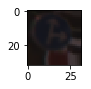

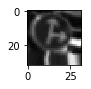

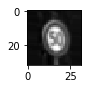

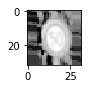

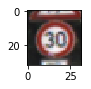

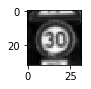

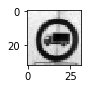

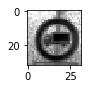

In [14]:
import random
import pickle
from sklearn.model_selection import train_test_split

train_data = "train.p"
test_data = "test.p"

# flip training data and prepare it to create a balanced trainind data
X_train, y_train = load_pickled_data(train_data, ['features', 'labels'])
print("Number of training examples in initial dataset =", X_train.shape[0])
_, class_counts = np.unique(y_train, return_counts = True)
X_train, y_train = flip_extend(X_train, y_train)
print("Number of training examples after horizontal flipping =", X_train.shape[0])

# Prepare a dataset with balanced classes
X_train_balanced, y_train_balanced = extend_balancing_classes(X_train, y_train, aug_intensity = 0.75, counts = np.full(43, 3000, dtype = int))
print("Number of training examples after augmenting and balancing training data =", X_train_balanced.shape[0])


# pre-process training data and save it to a explicit file for better handling
print('=======================GRAYSCALE &&& NORMALIZE TRAINING SET===============================')    
X_train, y_train = pre_precess_gray_normalize(X_train_balanced, y_train_balanced)
print('=======================EQUALIZATION OF TRAINING SET===================================')    
X_trainBalaancedPrePrecessed, y_trainBalaancedPrePrecessed = pre_process_equalHist(X_train, y_train)


# pre-process training data and save it to a explicit file for better handling
X_test, y_test = load_pickled_data(test_data, ['features', 'labels'])

print('=======================GRAYSCALE &&& NORMALIZE TEST SET===================================')    
X_test, y_test = pre_precess_gray_normalize(X_test, y_test)
print('=======================EQUALIZATION OF TEST SET===================================')    
X_test, y_test = pre_process_equalHist(X_test, y_test)

#test for saving the data to the disc
#pickle.dump({
        #"features" : X_test,
        #"labels" : y_test
    #}, open(test_preprocessed_dataset_file, "wb" ) )
#print("Preprocessed extended testing dataset saved in", test_preprocessed_dataset_file)

#Split for validation data --> 25 percent of training data
X_trainBalaancedPrePrecessed, X_valid, y_trainBalaancedPrePrecessed, y_valid = train_test_split(X_trainBalaancedPrePrecessed, y_trainBalaancedPrePrecessed, test_size = 0.25)



In [22]:
#Check the data set after preprocessing
#X_trainBalaancedPrePrecessed = X_trainBalaancedPrePrecessed.reshape(X_trainBalaancedPrePrecessed.shape + (1,))
#X_valid = np.reshape(X_valid.shape + (1,))

print("Shape of train balanced preprocessed =", X_trainBalaancedPrePrecessed[0].shape)
print("Shape of train balanced preprocessed =", X_trainBalaancedPrePrecessed.shape[0])
print("Shape of train validation set =", X_valid[0].shape)
print("Shape of train validation set =", X_valid.shape[0])
print("Shape of train test preprocessed =", X_test[0].shape)
print("Shape of train test preprocessed =", X_test.shape[0])


Shape of train balanced preprocessed = (32, 32, 1)
Shape of train balanced preprocessed = 113715
Shape of train validation set = (32, 32, 1)
Shape of train validation set = 37905
Shape of train test preprocessed = (32, 32, 1)
Shape of train test preprocessed = 12630


(array([  3000.,   6960.,   3000.,   3000.,   3000.,   6300.,   3000.,
          3000.,   3000.,   3000.,   3000.,   3000.,  10560.,   6840.,
          3000.,   3000.,   3000.,   6960.,   3000.,   3000.,   3000.,
          3000.,   3000.,   3000.,   3000.,   3000.,   3000.,   3000.,
          3000.,   3000.,   3000.,   3000.,   3000.,   3000.,   3000.,
          3000.,   3000.,   3000.,   3000.,   3000.,   3000.,   3000.,
          3000.]),
 array([  0.        ,   0.97674419,   1.95348837,   2.93023256,
          3.90697674,   4.88372093,   5.86046512,   6.8372093 ,
          7.81395349,   8.79069767,   9.76744186,  10.74418605,
         11.72093023,  12.69767442,  13.6744186 ,  14.65116279,
         15.62790698,  16.60465116,  17.58139535,  18.55813953,
         19.53488372,  20.51162791,  21.48837209,  22.46511628,
         23.44186047,  24.41860465,  25.39534884,  26.37209302,
         27.34883721,  28.3255814 ,  29.30232558,  30.27906977,
         31.25581395,  32.23255814,  33.209

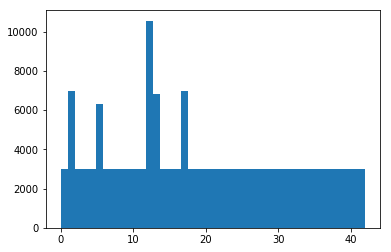

In [23]:
# Analysis of how the several classes are balanced after argumented 
pyplot.hist(y_train, bins=43)

### Model Architecture

In [9]:

# ## Implement LeNet-5
# Implement the [LeNet-5](http://yann.lecun.com/exdb/lenet/) neural network architecture.
# 
# ### Input
# The LeNet architecture accepts a 32x32xC image as input, where C is the number of color channels. Since MNIST images are grayscale, C is 1 in this case. 
# ### Architecture
# **Layer 1: Convolutional.** The output shape should be 28x28x6.
# 
# **Activation.** Your choice of activation function.
# 
# **Pooling.** The output shape should be 14x14x6.
# 
# **Layer 2: Convolutional.** The output shape should be 10x10x16.
# 
# **Activation.** Your choice of activation function.
# 
# **Pooling.** The output shape should be 5x5x16.
# 
# **Flatten.** Flatten the output shape of the final pooling layer such that it's 1D instead of 3D. The easiest way to do is by using `tf.contrib.layers.flatten`, which is already imported for you.
# 
# **Layer 3: Fully Connected.** This should have 120 outputs.
# 
# **Activation.** Your choice of activation function.
# 
# **Layer 4: Fully Connected.** This should have 84 outputs.
# 
# **Activation.** Your choice of activation function.
# 
# **Layer 5: Fully Connected (Logits).** This should have 10 outputs.
# 
# ### Output
# Return the result of the 2nd fully connected layer.



from tensorflow.contrib.layers import flatten
import tensorflow as tf

EPOCHS = 30
BATCH_SIZE = 128
#BATCH_SIZE = 256

def LeNet(x):    
    # Arguments used for tf.truncated_normal, randomly defines variables for the weights and biases for each layer
    mu = 0
    sigma = 0.1
    
    #print(" Shape at start {}:".format(x[0].shape))    

    #Layer 1: Convolutional. Input = 32x32x1. Output = 28x28x6.
    conv1_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 1, 6), mean = mu, stddev = sigma))
    conv1_b = tf.Variable(tf.zeros(6))
    conv1   = tf.nn.conv2d(x, conv1_W, strides=[1, 1, 1, 1], padding='VALID') + conv1_b

    #  Activation.
    conv1 = tf.nn.relu(conv1)

    #  Pooling. Input = 28x28x6. Output = 14x14x6.
    conv1 = tf.nn.max_pool(conv1, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #  Layer 2: Convolutional. Output = 10x10x16.
    conv2_W = tf.Variable(tf.truncated_normal(shape=(5, 5, 6, 16), mean = mu, stddev = sigma))
    conv2_b = tf.Variable(tf.zeros(16))
    conv2   = tf.nn.conv2d(conv1, conv2_W, strides=[1, 1, 1, 1], padding='VALID') + conv2_b
    
    # Activation.
    conv2 = tf.nn.relu(conv2)

    # Pooling. Input = 10x10x16. Output = 5x5x16.
    conv2 = tf.nn.max_pool(conv2, ksize=[1, 2, 2, 1], strides=[1, 2, 2, 1], padding='VALID')

    #  Flatten. Input = 5x5x16. Output = 400.
    fc0   = flatten(conv2)
    
    #  Layer 3: Fully Connected. Input = 400. Output = 120.
    fc1_W = tf.Variable(tf.truncated_normal(shape=(400, 120), mean = mu, stddev = sigma))
    fc1_b = tf.Variable(tf.zeros(120))
    fc1   = tf.matmul(fc0, fc1_W) + fc1_b
    
    #  Activation.
    fc1    = tf.nn.relu(fc1)

    #  Layer 4: Fully Connected. Input = 120. Output = 84.
    fc2_W  = tf.Variable(tf.truncated_normal(shape=(120, 84), mean = mu, stddev = sigma))
    fc2_b  = tf.Variable(tf.zeros(84))
    fc2    = tf.matmul(fc1, fc2_W) + fc2_b
    
    #  Activation.
    fc2    = tf.nn.relu(fc2)

    #  Layer 5: Fully Connected. Input = 84. Output = 10.
    fc3_W  = tf.Variable(tf.truncated_normal(shape=(84, 43), mean = mu, stddev = sigma))
    fc3_b  = tf.Variable(tf.zeros(43))
    logits = tf.matmul(fc2, fc3_W) + fc3_b
    
    return logits

### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation
sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

In [10]:
# ## Features and Labels
# `x` is a placeholder for a batch of input images.
# `y` is a placeholder for a batch of output labels.
x = tf.placeholder(tf.float32, (None, 32, 32, 1))
y = tf.placeholder(tf.int32, (None))
one_hot_y = tf.one_hot(y, 43)

#print("shape of one hot {} examples :".format(one_hot_y[0]))
#print("shape of y {} examples :".format(y[0]))


In [11]:
# ## Training Pipeline
# Create a training pipeline that uses the model to classify MNIST data.
rate = 0.0008

logits = LeNet(x)
cross_entropy = tf.nn.softmax_cross_entropy_with_logits(logits, one_hot_y)
loss_operation = tf.reduce_mean(cross_entropy)
optimizer = tf.train.AdamOptimizer(learning_rate = rate)
training_operation = optimizer.minimize(loss_operation)

In [12]:
### Calculate and report the accuracy on the training and validation set.
# Evaluate how well the loss and accuracy of the model for a given dataset.

correct_prediction = tf.equal(tf.argmax(logits, 1), tf.argmax(one_hot_y, 1))
accuracy_operation = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))
saver = tf.train.Saver()

def evaluate(X_data, y_data):
    num_examples = len(X_data)
    total_accuracy = 0
    sess = tf.get_default_session()
    for offset in range(0, num_examples, BATCH_SIZE):
        batch_x, batch_y = X_data[offset:offset+BATCH_SIZE], y_data[offset:offset+BATCH_SIZE]
        accuracy = sess.run(accuracy_operation, feed_dict={x: batch_x, y: batch_y})
        total_accuracy += (accuracy * len(batch_x))
    return total_accuracy / num_examples

In [28]:
# ## Train the Model
# Run the training data through the training pipeline to train the model.
# 
# Before each epoch, shuffle the training set.
# 
# After each epoch, measure the loss and accuracy of the validation set.


with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    num_examples = len(X_trainBalaancedPrePrecessed)
    
    print("Training...")
    for i in range(EPOCHS):
        X_trainBalaancedPrePrecessed, y_trainBalaancedPrePrecessed = shuffle(X_trainBalaancedPrePrecessed, y_trainBalaancedPrePrecessed)
        for offset in range(0, num_examples, BATCH_SIZE):
            end = offset + BATCH_SIZE
            batch_x, batch_y = X_trainBalaancedPrePrecessed[offset:end], y_trainBalaancedPrePrecessed[offset:end]
            sess.run(training_operation, feed_dict={x: batch_x, y: batch_y})
            
        validation_accuracy = evaluate(X_valid, y_valid)
        print("EPOCH {} ...".format(i+1))
        print("Validation Accuracy = {:.3f}".format(validation_accuracy))
        print()
        
    saver.save(sess, './lenet')
    print("Model saved")

Training...
EPOCH 1 ...
Validation Accuracy = 0.530

EPOCH 2 ...
Validation Accuracy = 0.619

EPOCH 3 ...
Validation Accuracy = 0.661

EPOCH 4 ...
Validation Accuracy = 0.681

EPOCH 5 ...
Validation Accuracy = 0.712

EPOCH 6 ...
Validation Accuracy = 0.736

EPOCH 7 ...
Validation Accuracy = 0.752

EPOCH 8 ...
Validation Accuracy = 0.754

EPOCH 9 ...
Validation Accuracy = 0.771

EPOCH 10 ...
Validation Accuracy = 0.779

EPOCH 11 ...
Validation Accuracy = 0.789

EPOCH 12 ...
Validation Accuracy = 0.793

EPOCH 13 ...
Validation Accuracy = 0.803

EPOCH 14 ...
Validation Accuracy = 0.799

EPOCH 15 ...
Validation Accuracy = 0.809

EPOCH 16 ...
Validation Accuracy = 0.806

EPOCH 17 ...
Validation Accuracy = 0.820

EPOCH 18 ...
Validation Accuracy = 0.814

EPOCH 19 ...
Validation Accuracy = 0.822

EPOCH 20 ...
Validation Accuracy = 0.826

EPOCH 21 ...
Validation Accuracy = 0.824

EPOCH 22 ...
Validation Accuracy = 0.825

EPOCH 23 ...
Validation Accuracy = 0.830

EPOCH 24 ...
Validation Accurac

In [29]:
# ## Evaluate the Model with TEST DATA
# Once you are completely satisfied with your model, evaluate the performance of the model on the test set.
# Be sure to only do this once!

with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))

    test_accuracy = evaluate(X_test, y_test)
    print("Test Accuracy = {:.3f}".format(test_accuracy))


Test Accuracy = 0.911


---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [13]:
import matplotlib.gridspec as gridspec
import matplotlib.image as mpimg
from skimage import io
import os
import numpy as np
import cv2

(32, 32, 3)
(5, 32, 32, 3)
(32, 32, 3)
(5, 32, 32, 3)
(32, 32, 3)
(5, 32, 32, 3)
(32, 32, 3)
(5, 32, 32, 3)
(32, 32, 3)
(5, 32, 32, 3)
Preprocess of data which counts 5 examples :
 Shape of input data array at start (32, 32, 3):
=======================PLOT RANDOM INPUT IMAGE=============================================
=======================CALCULATE GRAYSCALED IMAGES=========================================
 Shape of input (32, 32):
 Shape after gray scaling (32, 32):
=======================PLOT NORMALIZED GRAYSCALED RESULT==================================
=======================CALCULATE NORMAILZED GRAYSCALED IMAGES=============================
 Shape after normalization of grayScaled (32, 32):
Preprocess of data which counts 5 examples :
 Shape of input data array at start (32, 32):
=======================PLOT RANDOM INPUT IMAGE=============================================
=======================CALCULATE EQUALIZATION ADAPHIST IMAGES===============================
 |██████████████

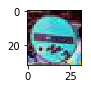

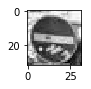

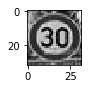

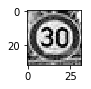

In [16]:
# Prepare new image data
# Load images from .ipg files to `X_newImages` numpy array
X_newImages = np.empty((5, 32, 32, 3))
for i in range(5):
    #read images of pre sized 32,32,3
    image = mpimg.imread(os.getcwd() + '/examples/' + "cropexample{0:0>2}".format(i + 1) + '.jpg')
    print(np.shape(image))
    

    X_newImages[i] = image
    print(np.shape(X_newImages))

### provide validation    
y_newImages = np.array([
    17, # "example01"
    1, # "example02"
    5, # "example03"
    13, # "example04"
    14, # "example05"    
])

# Preprocess and get predictions based on the current model
X_newImages, _ = pre_precess_gray_normalize(X_newImages)
X_newImages, _ = pre_process_equalHist(X_newImages)
  

### Predict the Sign Type for Each Image

### Analyze Performance

In [27]:
### Run the predictions here and use the model to output the prediction for each image.
with tf.Session() as sess:
    saver.restore(sess, tf.train.latest_checkpoint('.'))
    softmax = tf.nn.softmax(logits)
    result = sess.run(softmax, feed_dict={x: X_newImages})
    values, indices = tf.nn.top_k(result, 5)
    probs = sess.run(values)
    predictions = sess.run(indices)
    predicitons = np.array([predictions])
    
print("predictions")
print(predictions)
print(probs)

#test_accuracy = evaluate(X_test, y_test)
#print("Test Accuracy = {:.3f}".format(test_accuracy))

predictions
[[17  9 14 13 23]
 [ 0  1  2  8  5]
 [ 8  0  1  3  5]
 [28 13 29 23 19]
 [14  8  1  2  3]]
[[  9.96132016e-01   2.49533635e-03   8.56296741e-04   1.68770712e-04
    9.64837964e-05]
 [  6.50137782e-01   3.47359717e-01   2.43860949e-03   4.76468995e-05
    8.84567999e-06]
 [  9.68676448e-01   2.71145795e-02   1.54331559e-03   1.34479755e-03
    1.17259100e-03]
 [  3.31779718e-01   2.47120306e-01   1.03428818e-01   8.77406150e-02
    8.63613263e-02]
 [  9.99982357e-01   8.44128954e-06   3.06176958e-06   2.28835552e-06
    1.86717057e-06]]


In [170]:
### Calculate the accuracy for these 5 new images. 
### For example, if the model predicted 1 out of 5 signs correctly, it's 20% accurate on these new images.

acurracyNewImages= 2*100/5 

print(acurracyNewImages ,"%")

40.0 %


### Output Top 5 Softmax Probabilities For Each Image Found on the Web

For each of the new images, print out the model's softmax probabilities to show the **certainty** of the model's predictions (limit the output to the top 5 probabilities for each image). [`tf.nn.top_k`](https://www.tensorflow.org/versions/r0.12/api_docs/python/nn.html#top_k) could prove helpful here. 

The example below demonstrates how tf.nn.top_k can be used to find the top k predictions for each image.

`tf.nn.top_k` will return the values and indices (class ids) of the top k predictions. So if k=3, for each sign, it'll return the 3 largest probabilities (out of a possible 43) and the correspoding class ids.

Take this numpy array as an example. The values in the array represent predictions. The array contains softmax probabilities for five candidate images with six possible classes. `tk.nn.top_k` is used to choose the three classes with the highest probability:

```
# (5, 6) array
a = np.array([[ 0.24879643,  0.07032244,  0.12641572,  0.34763842,  0.07893497,
         0.12789202],
       [ 0.28086119,  0.27569815,  0.08594638,  0.0178669 ,  0.18063401,
         0.15899337],
       [ 0.26076848,  0.23664738,  0.08020603,  0.07001922,  0.1134371 ,
         0.23892179],
       [ 0.11943333,  0.29198961,  0.02605103,  0.26234032,  0.1351348 ,
         0.16505091],
       [ 0.09561176,  0.34396535,  0.0643941 ,  0.16240774,  0.24206137,
         0.09155967]])
```

Running it through `sess.run(tf.nn.top_k(tf.constant(a), k=3))` produces:

```
TopKV2(values=array([[ 0.34763842,  0.24879643,  0.12789202],
       [ 0.28086119,  0.27569815,  0.18063401],
       [ 0.26076848,  0.23892179,  0.23664738],
       [ 0.29198961,  0.26234032,  0.16505091],
       [ 0.34396535,  0.24206137,  0.16240774]]), indices=array([[3, 0, 5],
       [0, 1, 4],
       [0, 5, 1],
       [1, 3, 5],
       [1, 4, 3]], dtype=int32))
```

Looking just at the first row we get `[ 0.34763842,  0.24879643,  0.12789202]`, you can confirm these are the 3 largest probabilities in `a`. You'll also notice `[3, 0, 5]` are the corresponding indices.

In [76]:
#Preprocess images
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
        
def plotNewImagesResult(predictions, counter):
    
    
    # Prepare original and preprocessed images
    original = mpimg.imread(os.getcwd() + '/examples/' + "cropexample{0:0>2}".format(i + 1) + '.jpg')
    preprocessed = X_newImages[counter].reshape(32, 32)
    # Prepare the grid
    pyplot.figure(figsize = (6, 2))
    gridspec.GridSpec(2, 2)
    
    # Plot original image
    pyplot.subplot2grid((2, 2), (0, 0), colspan=1, rowspan=1)
    pyplot.imshow(original)
    pyplot.axis('off')

    # Plot preprocessed image
    pyplot.subplot2grid((2, 2), (1, 0), colspan=1, rowspan=1)
    pyplot.imshow(preprocessed, cmap='gray')
    pyplot.axis('off')

    # Plot predictions
    pyplot.subplot2grid((2, 2), (0, 1), colspan=1, rowspan=2)
    pyplot.barh(np.arange(5)+.5, probs[counter], align='center')
    #pyplot.barh(np.arange(5)+.5, predictions[counter], align='center')
    #pyplot.barh(np.arange(5)+.5, np.arange(1), align='center')
    #pyplot.yticks(np.arange(5)+.5, signnames[predictions[1][counter].astype(int)])
    pyplot.yticks(np.arange(5)+.5, signnames[predictions[counter].astype(int)])
    pyplot.tick_params(axis='both', which='both', labelleft='off', labelright='on', labeltop='off', labelbottom='on')
    #plt.gca().invert_yaxis()



    
    pyplot.show()

Actual class:  No entry


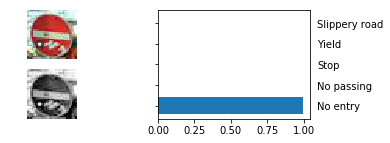

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (30km/h)


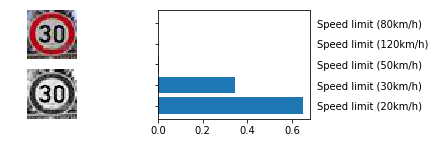

---------------------------------------------------------------------------------------------------

Actual class:  Speed limit (80km/h)


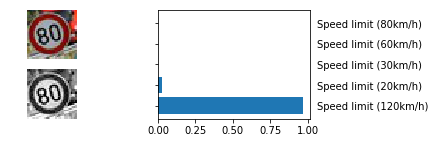

---------------------------------------------------------------------------------------------------

Actual class:  Yield


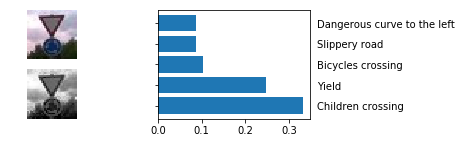

---------------------------------------------------------------------------------------------------

Actual class:  Stop


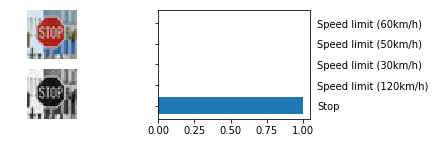

---------------------------------------------------------------------------------------------------



In [77]:
# For every example plot original image, preprocessed image, and model predictions.
signnames = read_csv("signnames.csv").values[:, 1]

for i in range(5):
    print("Actual class: ", signnames[y_newImages[i]] if y_newImages[i] != 99 else "None")
    plotNewImagesResult(predictions, i)
    print("---------------------------------------------------------------------------------------------------\n")

---

## Step 4: Visualize the Neural Network's State with Test Images

 This Section is not required to complete but acts as an additional excersise for understaning the output of a neural network's weights. While neural networks can be a great learning device they are often referred to as a black box. We can understand what the weights of a neural network look like better by plotting their feature maps. After successfully training your neural network you can see what it's feature maps look like by plotting the output of the network's weight layers in response to a test stimuli image. From these plotted feature maps, it's possible to see what characteristics of an image the network finds interesting. For a sign, maybe the inner network feature maps react with high activation to the sign's boundary outline or to the contrast in the sign's painted symbol.

 Provided for you below is the function code that allows you to get the visualization output of any tensorflow weight layer you want. The inputs to the function should be a stimuli image, one used during training or a new one you provided, and then the tensorflow variable name that represents the layer's state during the training process, for instance if you wanted to see what the [LeNet lab's](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) feature maps looked like for it's second convolutional layer you could enter conv2 as the tf_activation variable.

For an example of what feature map outputs look like, check out NVIDIA's results in their paper [End-to-End Deep Learning for Self-Driving Cars](https://devblogs.nvidia.com/parallelforall/deep-learning-self-driving-cars/) in the section Visualization of internal CNN State. NVIDIA was able to show that their network's inner weights had high activations to road boundary lines by comparing feature maps from an image with a clear path to one without. Try experimenting with a similar test to show that your trained network's weights are looking for interesting features, whether it's looking at differences in feature maps from images with or without a sign, or even what feature maps look like in a trained network vs a completely untrained one on the same sign image.

<figure>
 <img src="visualize_cnn.png" width="380" alt="Combined Image" />
 <figcaption>
 <p></p> 
 <p style="text-align: center;"> Your output should look something like this (above)</p> 
 </figcaption>
</figure>
 <p></p> 


In [ ]:
### Visualize your network's feature maps here.
### Feel free to use as many code cells as needed.

# image_input: the test image being fed into the network to produce the feature maps
# tf_activation: should be a tf variable name used during your training procedure that represents the calculated state of a specific weight layer
# activation_min/max: can be used to view the activation contrast in more detail, by default matplot sets min and max to the actual min and max values of the output
# plt_num: used to plot out multiple different weight feature map sets on the same block, just extend the plt number for each new feature map entry

def outputFeatureMap(image_input, tf_activation, activation_min=-1, activation_max=-1 ,plt_num=1):
    # Here make sure to preprocess your image_input in a way your network expects
    # with size, normalization, ect if needed
    # image_input =
    # Note: x should be the same name as your network's tensorflow data placeholder variable
    # If you get an error tf_activation is not defined it maybe having trouble accessing the variable from inside a function
    activation = tf_activation.eval(session=sess,feed_dict={x : image_input})
    featuremaps = activation.shape[3]
    plt.figure(plt_num, figsize=(15,15))
    for featuremap in range(featuremaps):
        plt.subplot(6,8, featuremap+1) # sets the number of feature maps to show on each row and column
        plt.title('FeatureMap ' + str(featuremap)) # displays the feature map number
        if activation_min != -1 & activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin =activation_min, vmax=activation_max, cmap="gray")
        elif activation_max != -1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmax=activation_max, cmap="gray")
        elif activation_min !=-1:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", vmin=activation_min, cmap="gray")
        else:
            plt.imshow(activation[0,:,:, featuremap], interpolation="nearest", cmap="gray")

### Question 9

Discuss how you used the visual output of your trained network's feature maps to show that it had learned to look for interesting characteristics in traffic sign images


**Answer:**

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.

### Project Writeup

Once you have completed the code implementation, document your results in a project writeup using this [template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) as a guide. The writeup can be in a markdown or pdf file. 